In [1]:
warnings.simplefilter(action='ignore', category=FutureWarning)

# Выбор локации для скважины

Заказчик: Добывающая компания «**********».
Цель: поиск наиболее перспективного региона для бурения скважин.

Задачи:
1. Построить модели и оценить объём запасов.
2. Выбрать месторождение с самым перспективными значениями целевого признака. 
3. Оценить риск убытков. Выбрать регион на основе полученных данных.

# Оглавление

1. [Загрузка и подготовка данных](#6)
2. [Обучение и проверка модели](#5)  
3. [Подготовка к расчёту прибыли](#4)  
4. [Расчёт прибыли](#3)  
5. [Расчёт рисков ](#2)
6. [Вывод](#1)

<a id="6"></a>
## Загрузка и подготовка данных

In [43]:
region_1 = pd.read_csv('geo_data_0.csv')
region_2 = pd.read_csv('geo_data_1.csv')
region_3 = pd.read_csv('geo_data_2.csv')

На анализ предоставлены три датасета, представляющие собой список скважин с набором характеристик.  
`id` — индивидуальный код каждой скважины. В процедуре проведения анализа не участвует.  
`f0`, `f1`, `f2` — набор признаков точек.  
`product` — объём запасов в скважине (тыс. баррелей). **Целевой признак.**    
В столбцах нет пропусков, артефактов.

Опишем распределение целевого признака в зависимости от региона.

### Регион 1

In [26]:
region_1.info()
region_1['product'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


count    100000.000000
mean         92.500000
std          44.288691
min           0.000000
25%          56.497507
50%          91.849972
75%         128.564089
max         185.364347
Name: product, dtype: float64

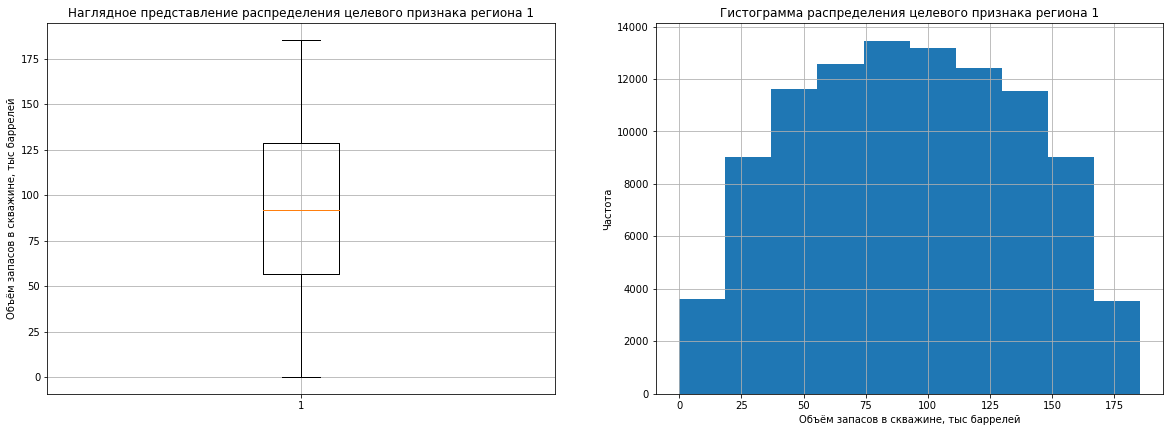

In [27]:
fig = plt.figure(figsize  = (20, 15))
ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)

ax_1.boxplot(region_1['product'])
ax_1.grid()
ax_1.set(title ='Наглядное представление распределения целевого признака региона 1')
ax_1.set_ylabel('Объём запасов в скважине, тыс баррелей')

ax_2 = region_1['product'].hist()
ax_2.set(title ='Гистограмма распределения целевого признака региона 1')
ax_2.set_xlabel('Объём запасов в скважине, тыс баррелей')
ax_2.set_ylabel('Частота')

plt.show()

Распределение гауссовское, данные распределены симметрично среднего значения. 

### Регион 2

In [28]:
region_2.info()
region_2['product'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


count    100000.000000
mean         68.825000
std          45.944423
min           0.000000
25%          26.953261
50%          57.085625
75%         107.813044
max         137.945408
Name: product, dtype: float64

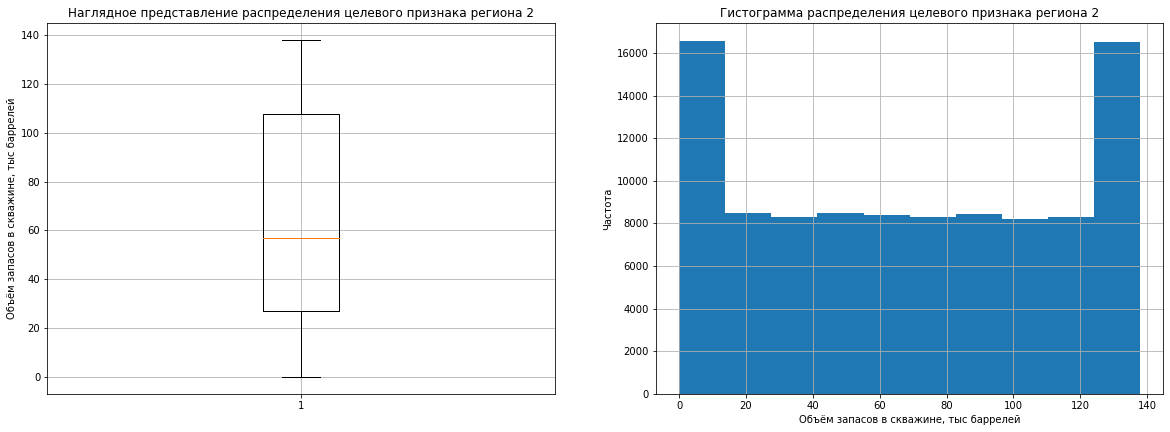

In [29]:
fig = plt.figure(figsize  = (20, 15))
ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)

ax_1.boxplot(region_2['product'])
ax_1.grid()
ax_1.set(title ='Наглядное представление распределения целевого признака региона 2')
ax_1.set_ylabel('Объём запасов в скважине, тыс баррелей')

ax_2 = region_2['product'].hist()
ax_2.set(title ='Гистограмма распределения целевого признака региона 2')
ax_2.set_xlabel('Объём запасов в скважине, тыс баррелей')
ax_2.set_ylabel('Частота')

plt.show()

Распределение несимметричное, наблюдается смещение в большую сторону от среднего значения. Пики значений приходятся на самые низкие и наиболее высокие значения. Распределение признака далеко от нормального.

### Регион 3

In [30]:
region_3.info()
region_3['product'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


count    100000.000000
mean         95.000000
std          44.749921
min           0.000000
25%          59.450441
50%          94.925613
75%         130.595027
max         190.029838
Name: product, dtype: float64

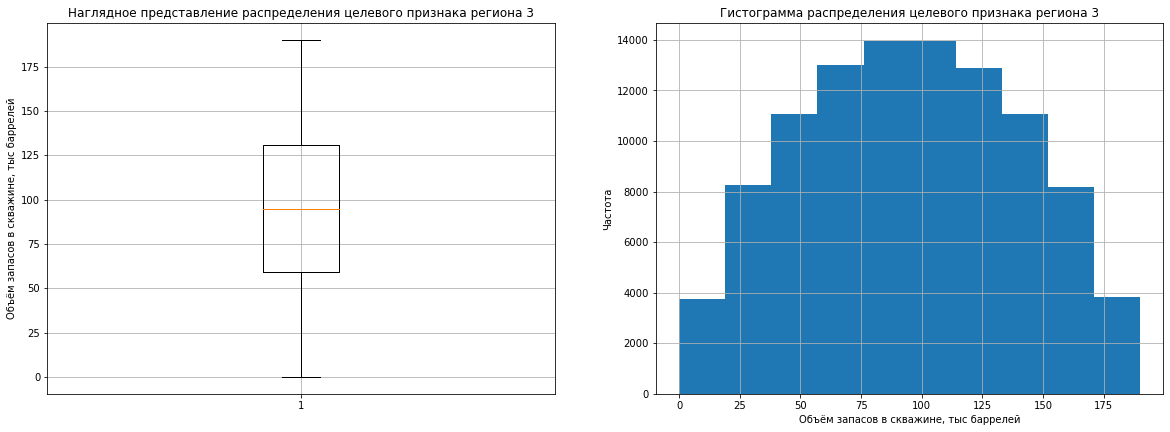

In [31]:
fig = plt.figure(figsize  = (20, 15))
ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)

ax_1.boxplot(region_3['product'])
ax_1.grid()
ax_1.set(title ='Наглядное представление распределения целевого признака региона 3')
ax_1.set_ylabel('Объём запасов в скважине, тыс баррелей')

ax_2 = region_3['product'].hist()
ax_2.set(title ='Гистограмма распределения целевого признака региона 3')
ax_2.set_xlabel('Объём запасов в скважине, тыс баррелей')
ax_2.set_ylabel('Частота')

plt.show()

Распределение гауссовское, данные распределены симметрично среднего значения. 

### Проверка на мультиколлинеарность

In [32]:
region_1.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [33]:
region_2.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


In [34]:
region_3.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


<a id="5"></a>
## Обучение и проверка модели

Обучим три модели - каждую на своём, посвященном одному региону, наборе данных.  
Избранная модель - линейная регрессия  
Избранные метрики: RMSE  

Целевой признак - объём нефти, который можно добыть из скважины. RMSE покажет, насколько в среднм отклоняются значения предсказанных значений целевого признака от реальных, т.е. покажет на сколько тысяч баррелей нефти в среднем ошибается модель.

Cледуя следующему алгоритму, обучим свою модель для каждого региона.  
1. Разобьём данные на обучающую и валидационную выборки в соотношении 75:25.
2. Обучим модель и сделаем предсказания на валидационной выборке.
3. Сохраним предсказания и правильные ответы на валидационной выборке.
4. Посчитаем RMSE модели.
5. Сравним RMSE модели со средним запасом сырья на действительных данных (ответах).

In [35]:
features = region_1.drop(['product', 'id'], axis = 1)
target = region_1['product']
features_train, features_valid, target_train, target_valid = train_test_split(features, target, 
                                                                              test_size = 0.25, random_state = 123)
model1 = LinearRegression()
model1.fit(features_train, target_train)
predictions_valid = model1.predict(features_valid)
result = mean_squared_error(target_valid, predictions_valid)**0.5
mean = predictions_valid.mean()
print('RMSE модели линейной регрессии на валидационной выборке:', result)
print('Предсказанный средний запас сырья', mean)
print('Средний запас сырья', target.mean())

RMSE модели линейной регрессии на валидационной выборке: 37.64786282376177
Предсказанный средний запас сырья 92.54936189116309
Средний запас сырья 92.49999999999974


In [36]:
features = region_2.drop(['product', 'id'], axis = 1)
target = region_2['product']
features_train, features_valid, target_train, target_valid = train_test_split(features, target, 
                                                                              test_size = 0.25, random_state = 123)
model2 = LinearRegression()
model2.fit(features_train, target_train)
predictions_valid = model2.predict(features_valid)
result = mean_squared_error(target_valid, predictions_valid)**0.5
mean = predictions_valid.mean()
print('RMSE модели линейной регрессии на валидационной выборке:', result)
print('Средний запас предсказанного сырья', mean)
print('Средний запас сырья', target.mean())

RMSE модели линейной регрессии на валидационной выборке: 0.8954139804944299
Средний запас предсказанного сырья 69.28001860653976
Средний запас сырья 68.82500000002561


In [37]:
features = region_3.drop(['product', 'id'], axis = 1)
target = region_3['product']
features_train, features_valid, target_train, target_valid = train_test_split(features, target, 
                                                                              test_size = 0.25, random_state = 123)
model3 = LinearRegression()
model3.fit(features_train, target_train)
predictions_valid = model3.predict(features_valid)
result = mean_squared_error(target_valid, predictions_valid)**0.5
mean = predictions_valid.mean()
print("RMSE модели линейной регрессии на валидационной выборке:", result)
print('Средний запас предсказанного сырья', mean)
print('Средний запас сырья', target.mean())

RMSE модели линейной регрессии на валидационной выборке: 40.12803006598514
Средний запас предсказанного сырья 95.09859933591373
Средний запас сырья 95.00000000000041


**Вывод: среднее всех предсказанных моделями значений (каждой для своего региона) достаточно близко к реальному среднему значению запасов сырья во всех скважинах (для этого региона). Модель №1 и №3 дают очень большой разброс предсказаний относительно реальных значений, в то время как вторая модель работает очень чётко.**

<a id="4"></a>
## Подготовка к расчёту прибыли

Данные из условия сохраним в переменных (для названия используем апперкейс).
Отметим: число скважин, подлежащих исследованию `N_SEARCH`, и разработке `N_BEST`, бюджет разработки `budget`, цена за тысячу литров баррелей `price`.

In [38]:
N_RESEARCH = 500
N_BEST = 200
BUDGET = 10000000000
PRICE = 450000

In [39]:
# если на разработку 500 точек выделяют 10 млрд ₽, тогда эту сумму мы "взыщем" с лучших 200 скважин.
# прибыль с каждой скважины в данном случае должна составлять 
PROFIT_PER_WELL = BUDGET / N_BEST
MIN_1000_BBLS = PROFIT_PER_WELL / PRICE 
print('Минимальный объём сырья для безубыточной разработки скважины составит:', MIN_1000_BBLS)

Минимальный объём сырья для безубыточной разработки скважины составит: 111.11111111111111


**Вывод: согласно расчётам и предсказаниям, ни в одном из наших регионов не хватит (по оценке среднего) сырья, чтобы разработка этого региона была безубыточна.** 

<a id="3"></a>
## Расчёт прибыли

Оценить регион просто по среднему - не достоверно и не информативно.   

Напишем функцию для расчёта прибыли, исходя из условий. "Смоделируем" разработку 500 скважин в регионах, а прибыль посчитаем по реальным значеням 200 лучших предсказанных моделью скважин.  

Последовательность работы функции:
1. Функция отсортирует предсказанные значения объемов сырья по убыванию, и выберет 200 лучших из них.
2. Далее она просуммирует целевое значение объёма сырья, соответствующее этим предсказаниям.
3. А после рассчитает прибыль для полученного объёма сырья (общая прибыль с N_BEST скважин за минусом ушедшего на разработку бюджета).

In [40]:
def profit_calculator(targeted, predicted):
    predicted = predicted.sort_values(ascending = False)[:N_BEST]
    top_200_wells = targeted[predicted.index]
    revenue = top_200_wells.sum()*PRICE
    return revenue - BUDGET

Рассчитаем прибыль с каждого региона.

In [41]:
regions = [region_1, region_2, region_3]
models = [model1, model2, model3]
for i in range(3):
    mean_values = []
    counter = 0
    general_predictions = pd.Series(models[i].predict(regions[i].drop(['product', 'id'], axis = 1)))
    target = regions[i]['product']
    print("Регион", i+1)
    print("Прибыль максимального объёма сырья с региона:", profit_calculator(target, general_predictions))
    print()

Регион 1
Прибыль максимального объёма сырья с региона: 3492332479.7777233

Регион 2
Прибыль максимального объёма сырья с региона: 2415086696.681511

Регион 3
Прибыль максимального объёма сырья с региона: 2595973993.4372005



**Вывод: пока самым прибыльным для разработки кажется регион 1: при прочих равных условиях прибыль с него наибольшая - но это если брать 200 самых перспективных скважин.**

<a id="2"></a>
## Расчёт рисков  

Для каждого региона рассчитаем среднюю прибыль, 95%-й доверительный интервал и риск убытков.  

Применим технику Bootstrap с тысячей выборок, чтобы найти распределение прибылиб а такде вероятность убытков. За вероятность убытка примем процент отрицательных исходов прибыли после построения её распределения техникой Bootstrap. Убыточнымм регион считается, если этот показатель составит более 2,5%.  

In [42]:
state = np.random.RandomState(123)
regions = [region_1, region_2, region_3]
models = [model1, model2, model3]
for i in range(3):
    mean_values = []
    counter = 0
    features = regions[i].drop(['product', 'id'], axis = 1)
    target = regions[i]['product']                           
    features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                              test_size = 0.25, random_state = 123)
    features_test = features_test.reset_index(drop = True)
    target_test = target_test.reset_index(drop = True)
    general_predictions = pd.Series(models[i].predict(features_test))
    for n in range(1001):
        predicted = general_predictions.sample(n=500, replace = True, random_state = state)
        value = profit_calculator(target_test, predicted)
        if value < 0:
            counter += 1
        mean_values.append(value)
    mean_values = pd.Series(mean_values)
    loss = counter * 100 / len(mean_values)
    confidence_interval = st.t.interval(0.95, len(mean_values)-1, mean_values.mean(), mean_values.sem())
    print("Регион", i+1)
    print("Средняя выручка:", mean_values.mean())
    print("95%-ый доверительный интервал:", (mean_values.quantile(0.025), mean_values.quantile(0.975)))
    print("% убытка", loss)
    print()

Регион 1
Средняя выручка: 477499021.60808253
95%-ый доверительный интервал: (-57827885.50036812, 974818776.7960873)
% убытка 4.095904095904096

Регион 2
Средняя выручка: 467670380.74186254
95%-ый доверительный интервал: (68908990.27456474, 871473437.4052334)
% убытка 0.999000999000999

Регион 3
Средняя выручка: 361696130.46366715
95%-ый доверительный интервал: (-182668406.7402687, 870952002.0044346)
% убытка 8.89110889110889



<a id="1"></a>
**Вывод: риск понести убытки для заказчика будет минимальным, если для разработки будут вестись  в регионе №2. Средняя выручка в этом регионе - наибольшая, а риски - наименьшие и составляют ~ 1%.**